In [2]:
import numpy as np
import matplotlib.pylab as plt
import pandas as pd
from pathlib import Path
import pickle
import seaborn as sns
from tqdm import tqdm

In [3]:
from neuron_preprocessing_utils import plot_neuron

In [4]:
colors = ['#7d0600', '#ad3f03', '#d87100', '#ffa600']

In [5]:
df_l4 = pd.read_pickle('../../../data/data_tables/df_manual_validation_L4.pkl')

In [6]:
len(df_l4)

120

#### Layer 4: Determine apical end threshold

In [8]:
df_l4.natural_termination.value_counts() / len(df_l4)

False    0.633333
True     0.366667
Name: natural_termination, dtype: float64

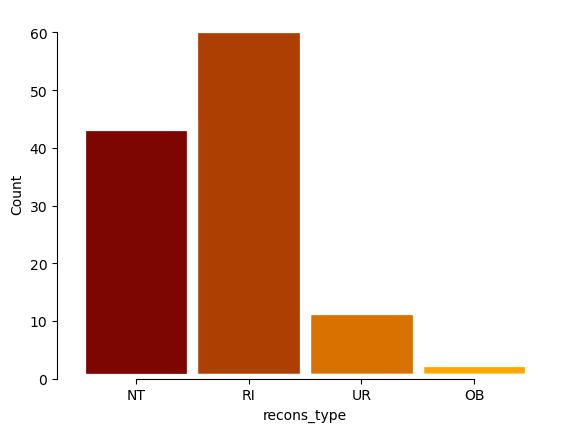

In [9]:
sns.histplot(
    data=df_l4,
    x='recons_type',
    hue='recons_type',
    palette=sns.color_palette(colors),
    lw=50,
    edgecolor='white',
    alpha=1,
    legend=False,
)
sns.despine(trim=10)

#### Find threshold

In [10]:
threshs = np.linspace(-5, 300, num=611)

In [11]:
tp = np.zeros(len(threshs))
fp = np.zeros(len(threshs))
fn = np.zeros(len(threshs))
tn = np.zeros(len(threshs))

for i, thresh in tqdm(enumerate(threshs)):
    for j, row in df_l4.iterrows():
        apical_end = row.total_end_y
        natural_termination = row.natural_termination

        if apical_end <= thresh:
            if natural_termination:
                tp[i] += 1
            else:
                fp[i] += 1

        else:
            if natural_termination:
                fn[i] += 1
            else:
                tn[i] += 1

611it [00:03, 170.14it/s]


In [12]:
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1 = (2 * precision * recall) / (precision + recall)

/tmp/ipykernel_1818590/3175193242.py:1: RuntimeWarning: invalid value encountered in divide
  precision = tp / (tp + fp)


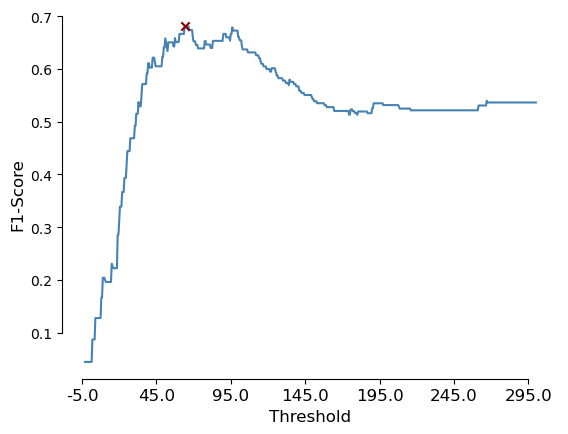

In [13]:
plt.plot(f1, color='steelblue')
plt.xticks(np.arange(611)[::100], threshs[::100], fontsize=12)
sns.despine(trim=10)
plt.xlabel('Threshold', fontsize=12)
plt.ylabel('F1-Score', fontsize=12)

plt.scatter([np.nanargmax(f1)], [np.nanmax(f1)], color='darkred', zorder=10, marker='x')

In [23]:
threshs[np.nanargmax(f1)]

64.0

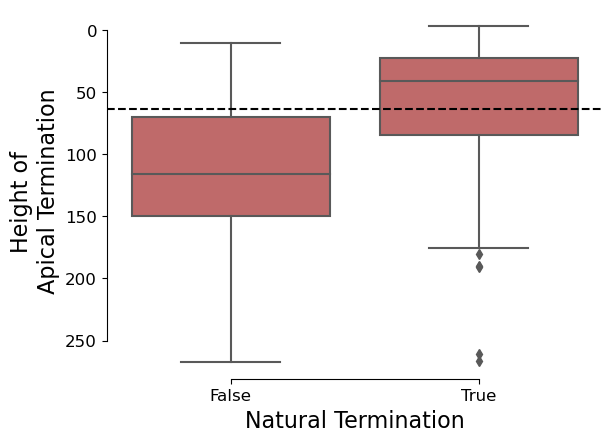

In [25]:
fig, ax = plt.subplots(1, 1)
sns.boxplot(
    data=df_l4, x='natural_termination', y='total_end_y', color='indianred', ax=ax
)
sns.despine(trim=10)
plt.xlabel('Natural Termination', fontsize=16)
plt.ylabel('Height of  \n Apical Termination', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

ax.invert_yaxis()

plt.plot(
    [-0.5, 1.5],
    [threshs[np.nanargmax(f1)], threshs[np.nanargmax(f1)]],
    '--',
    zorder=10,
    color='black',
    label='Treshold',
)